### 코랩에서 시각화 진행 할 경우
#### 한글 깨짐 현상 해결방법

1. 폰트 설치(아래 코드 실행)

```python
!apt-get update-qq
!apt-get install fonts-nanum* -qq
!rm ~/ .cache/matplotlib -rf
```

2. 런타임 재시작
3. 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
from matplotlib import rcParams

In [3]:
df1 = sns.load_dataset('penguins')
df1 = df1[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
df1 = df1.dropna().reset_index(drop = True)
df2 = sns.load_dataset('titanic')

In [4]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,36.7,19.3,193.0
4,Adelie,Torgersen,39.3,20.6,190.0
...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0
338,Gentoo,Biscoe,46.8,14.3,215.0
339,Gentoo,Biscoe,50.4,15.7,222.0
340,Gentoo,Biscoe,45.2,14.8,212.0


In [5]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# plot 함수

## line

<AxesSubplot:title={'center':'펭귄 라인 그래프'}>

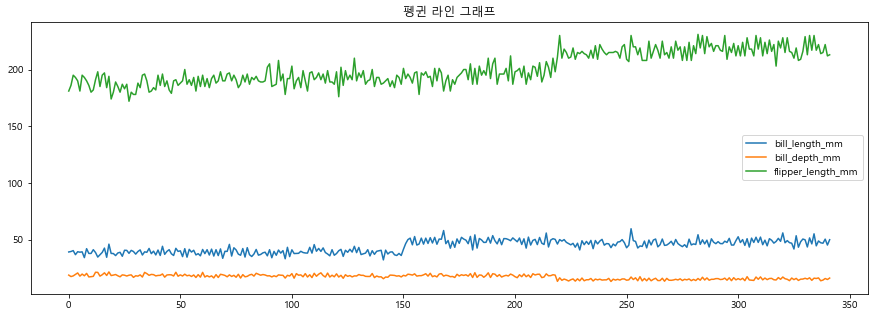

In [6]:
df1.plot(kind = 'line', figsize = (15, 5), title = '펭귄 라인 그래프')

<AxesSubplot:title={'center':'펭귄 날개(지느러미) 길이'}>

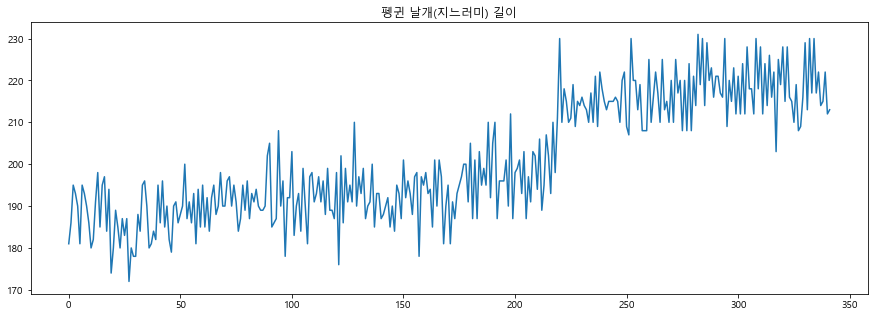

In [7]:
df1['flipper_length_mm'].plot(kind = 'line', figsize = (15, 5), title = '펭귄 날개(지느러미) 길이')

## bar

In [8]:
bar_df = df1.groupby(df1.species).mean()
bar_df

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,38.791391,18.346358,189.953642
Chinstrap,48.833824,18.420588,195.823529
Gentoo,47.504878,14.982114,217.186992


<AxesSubplot:title={'center':'펭귄종 별 평균'}, xlabel='species'>

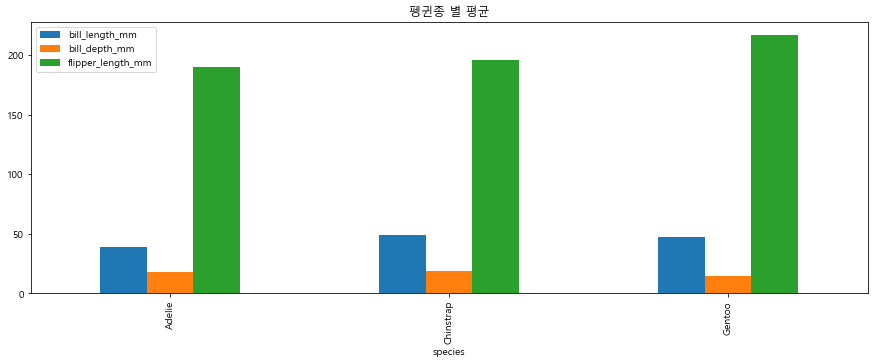

In [9]:
bar_df.plot(kind = 'bar', figsize = (15, 5), title = '펭귄종 별 평균')

<AxesSubplot:title={'center':'펭귄 특성별 평균'}>

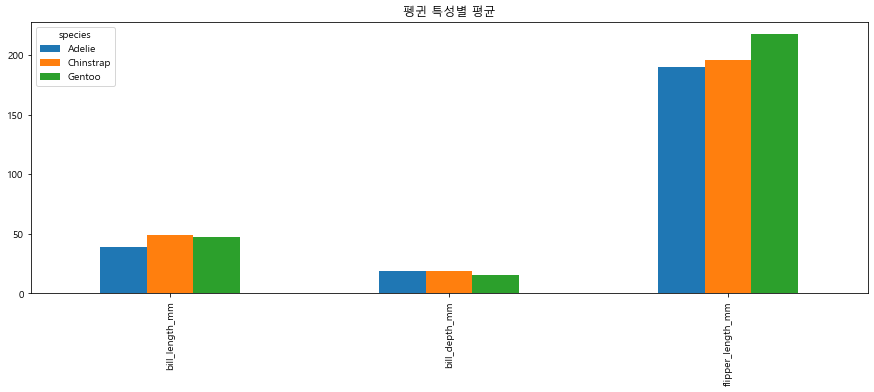

In [10]:
bar_df.T.plot(kind = 'bar', figsize = (15, 5), title = '펭귄 특성별 평균')

## hist

<AxesSubplot:title={'center':'펭귄 특성별 빈도수'}, ylabel='Frequency'>

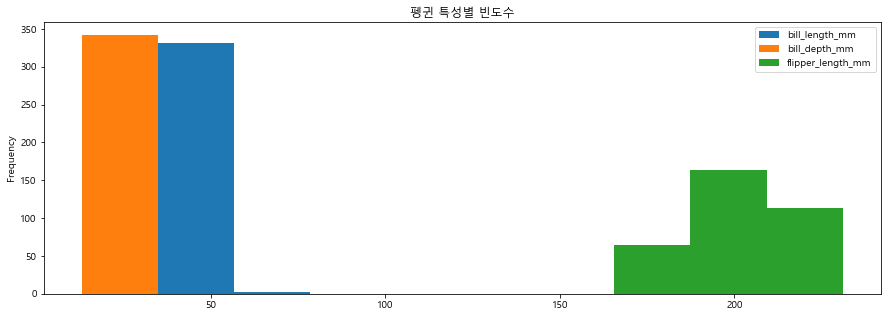

In [11]:
df1.plot(kind = 'hist', figsize = (15, 5), title = '펭귄 특성별 빈도수')

<AxesSubplot:title={'center':'펭귄 특성별 빈도수'}, ylabel='Frequency'>

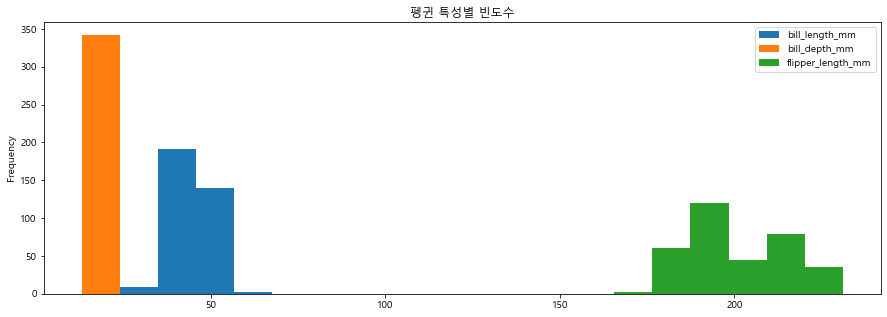

In [12]:
# bin 개수 지정

df1.plot(bins = 20, kind = 'hist', figsize = (15, 5), title = '펭귄 특성별 빈도수')

## box

<AxesSubplot:title={'center':'펭귄 특성별 값 범위'}>

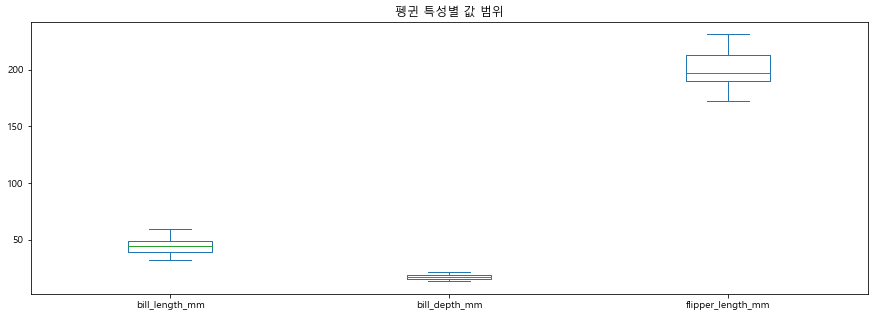

In [13]:
df1.plot(kind = 'box', figsize = (15, 5), title = '펭귄 특성별 값 범위')

## pie

In [14]:
# 선실별 승객수

pie_df = df2['pclass'].value_counts()

<AxesSubplot:title={'center':'선실별 승객수 비율'}, ylabel='pclass'>

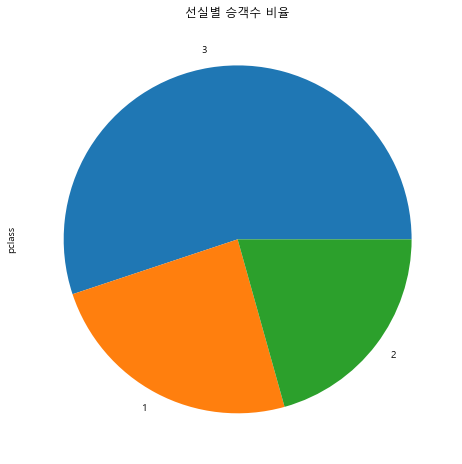

In [15]:
pie_df.plot(kind = 'pie', figsize = (15, 8), title = '선실별 승객수 비율')

<AxesSubplot:title={'center':'선실별 승객수 비율'}, ylabel='pclass'>

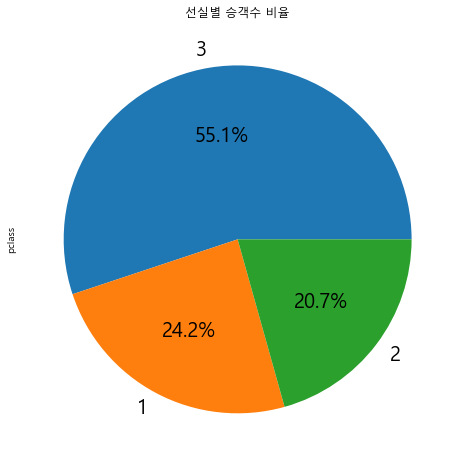

In [16]:
# 레이블 추가

pie_df.plot(kind = 'pie', figsize = (15, 8), title = '선실별 승객수 비율', autopct = '%.1f%%', fontsize = 20)

## scatter

<AxesSubplot:title={'center':'나이에 따른 타이타닉 승선 요금'}, xlabel='age', ylabel='fare'>

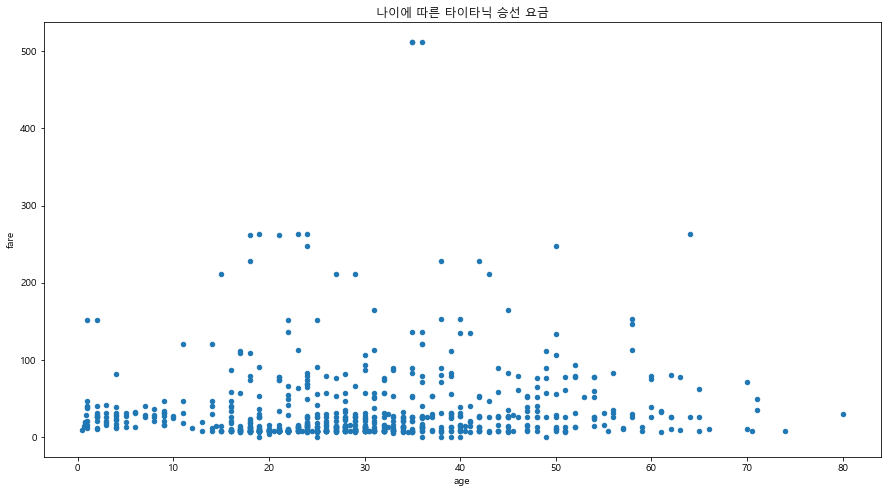

In [17]:
# 나이에 따른 타이타닉 승선 요금 시각화

df2.plot(kind = 'scatter', figsize = (15, 8), x = 'age', y = 'fare', title = '나이에 따른 타이타닉 승선 요금')

<AxesSubplot:title={'center':'나이에 따른 타이타닉 승선 요금'}, xlabel='age', ylabel='fare'>

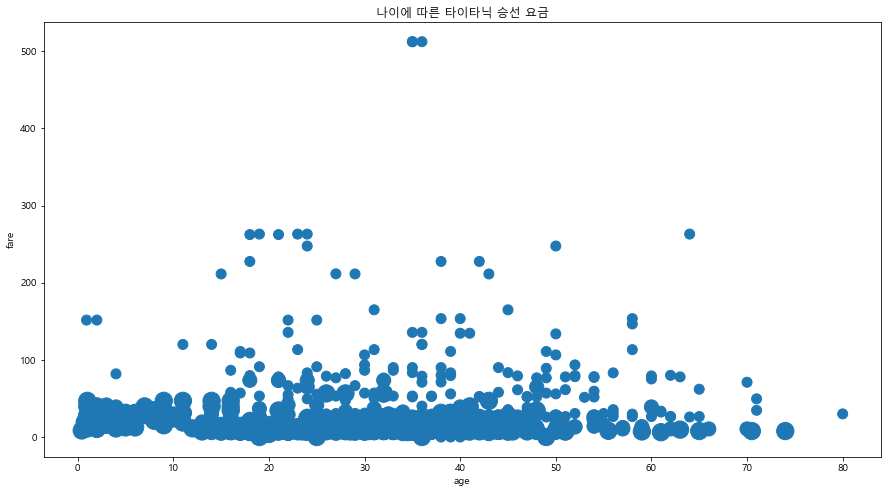

In [18]:
# 버블차트

df2.plot(kind = 'scatter', figsize = (15, 8), x = 'age', y = 'fare', title = '나이에 따른 타이타닉 승선 요금', s = df2['pclass'] * 100)